# Data Preprocessing

### **Data**
* I have three datasets for this Fraud detection project. I have use them by integreating and extracting best feature from the given datasets to create accurate and strong fraud detection models thast handle the unique challenges of both types of transaction.

#### **1. Fraud_Data**
Includes e-commerce transaction data aimed at identifying fraudulent activities.
* user_id: A unique identifier for the user who made the transaction.
* signup_time: The timestamp when the user signed up.
* purchase_time: The timestamp when the purchase was made.
* purchase_value: The value of the purchase in dollars.
* device_id: A unique identifier for the device used to make the transaction.
* source: The source through which the user came to the site (e.g., SEO, Ads).
* browser: The browser used to make the transaction (e.g., Chrome, Safari).
* sex: The gender of the user (M for male, F for female).
* age: The age of the user.
* ip_address: The IP address from which the transaction was made.
* class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

#### **2. IpAddress_to_Country**
Maps IP addresses to countries
* lower_bound_ip_address: The lower bound of the IP address range.
* upper_bound_ip_address: The upper bound of the IP address range.
* country: The country corresponding to the IP address range.

#### **3. creditcard**
Contains bank transaction data specifically curated for fraud detection analysis. 
* Time: The number of seconds elapsed between this transaction and the first transaction in the dataset.
* V1 to V28: These are anonymized features resulting from a PCA transformation. Their exact nature is not disclosed for privacy reasons, but they represent the underlying patterns in the data.
* Amount: The transaction amount in dollars.
* Class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.



In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sys, os 
import warnings
warnings.filterwarnings('ignore')

# get working directory
sys.path.append(os.path.abspath('..'))

# import Utilis
import scripts.data_preprocessing as dp

### Load data

In [2]:
# load data
fraud_data_path = '../data/Fraud_Data.csv'
ip_address_path = '../data/IpAddress_to_Country.csv'
credit_card_path = '../data/creditcard.csv'

fraud_data_df, ip_address_df, credit_card_df = dp.load_data(fraud_data_path, ip_address_path, credit_card_path)

### Datasets Preview

In [3]:
# datasets preveiw: First five rows of the dataset
fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
print("Fraud dataset Overview")
dp.data_summary(fraud_data_df)

Fraud dataset Overview
Shape of the dataset: (151112, 11)

Numerical Column Description:

             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


Unique Values per Column:

user_id           151112
signup_time       151112
pu

In [5]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print('Credit card dataset overview')
dp.data_summary(credit_card_df)

Credit card dataset overview
Shape of the dataset: (284807, 31)

Numerical Column Description:

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.48

## **Fraud Data Preprocessing**

In [8]:
# Make a copy of the fraud dataset
fraud_df = dp.get_fraud_data(fraud_data_df)

In [9]:
fraud_df.head()

,user_id,signup_time,purchase_time,time_to_first_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,492085.0,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,4361461.0,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


### Data Cleaning

#### Handle Missing Value

In [10]:
# check for missing value
fraud_df.isnull().sum()

user_id                   0
signup_time               0
purchase_time             0
time_to_first_purchase    0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
dtype: int64

**Insight:** There is no missing value in Fraud data

#### Handle Dublication

In [11]:
fraud_df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

In [12]:
fraud_df.head()

,user_id,signup_time,purchase_time,time_to_first_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,492085.0,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,4361461.0,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


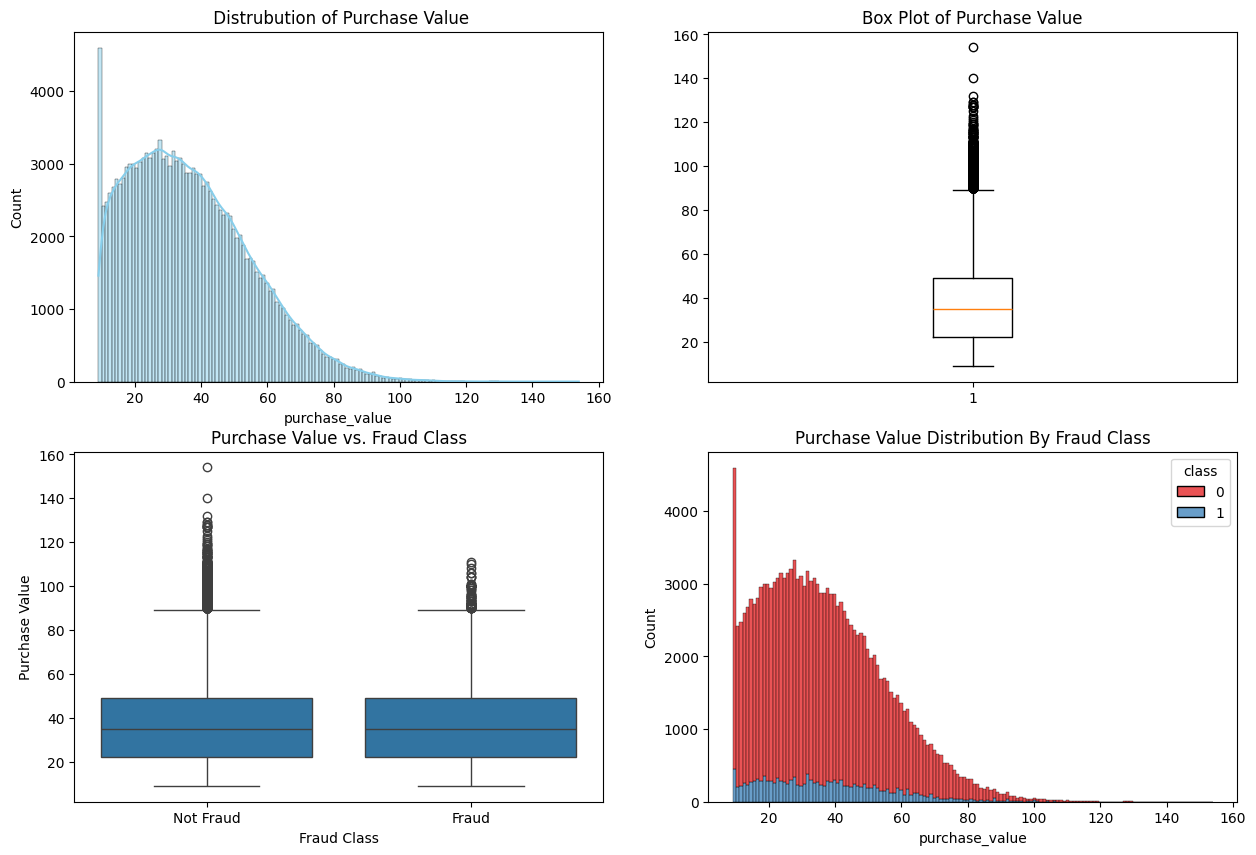

In [13]:
dp.purchase_value_visualization(fraud_df)

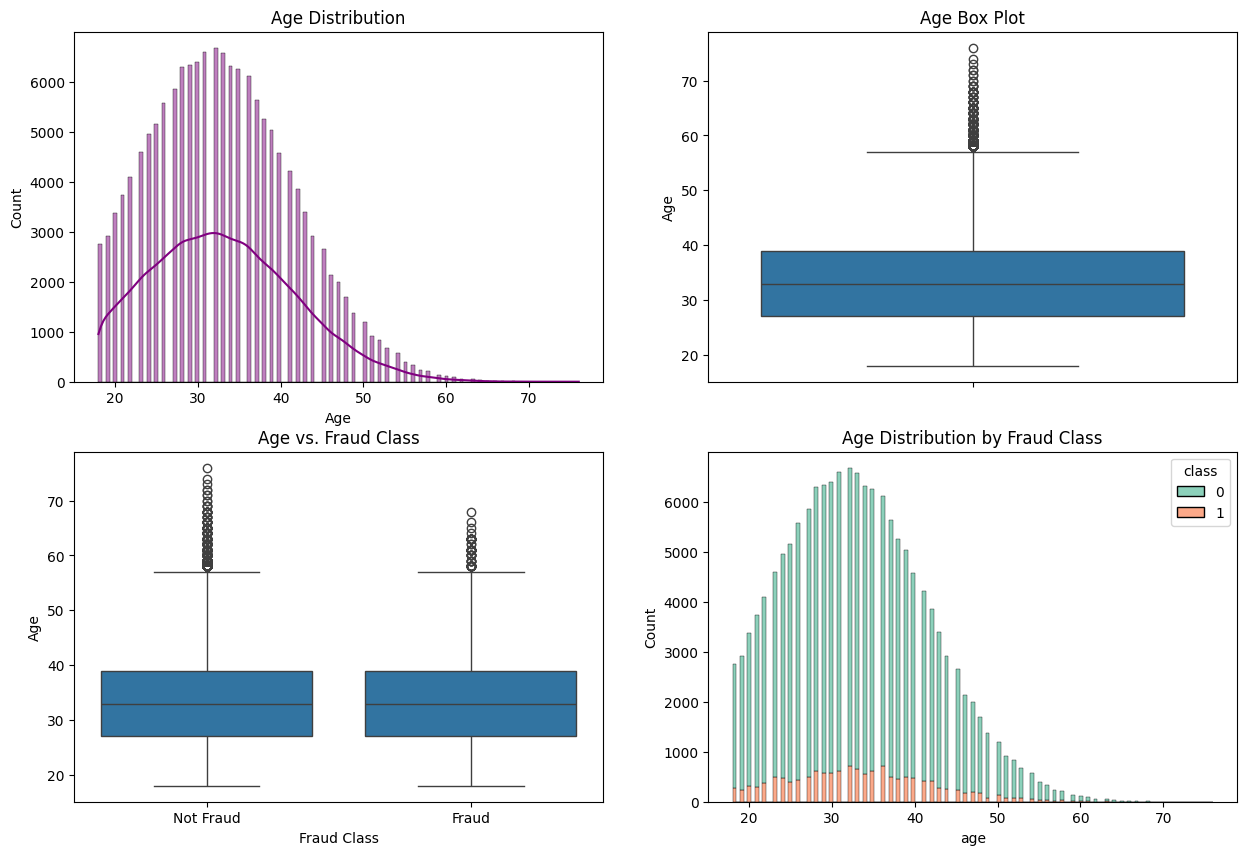

In [14]:
dp.age_visualization(fraud_df)

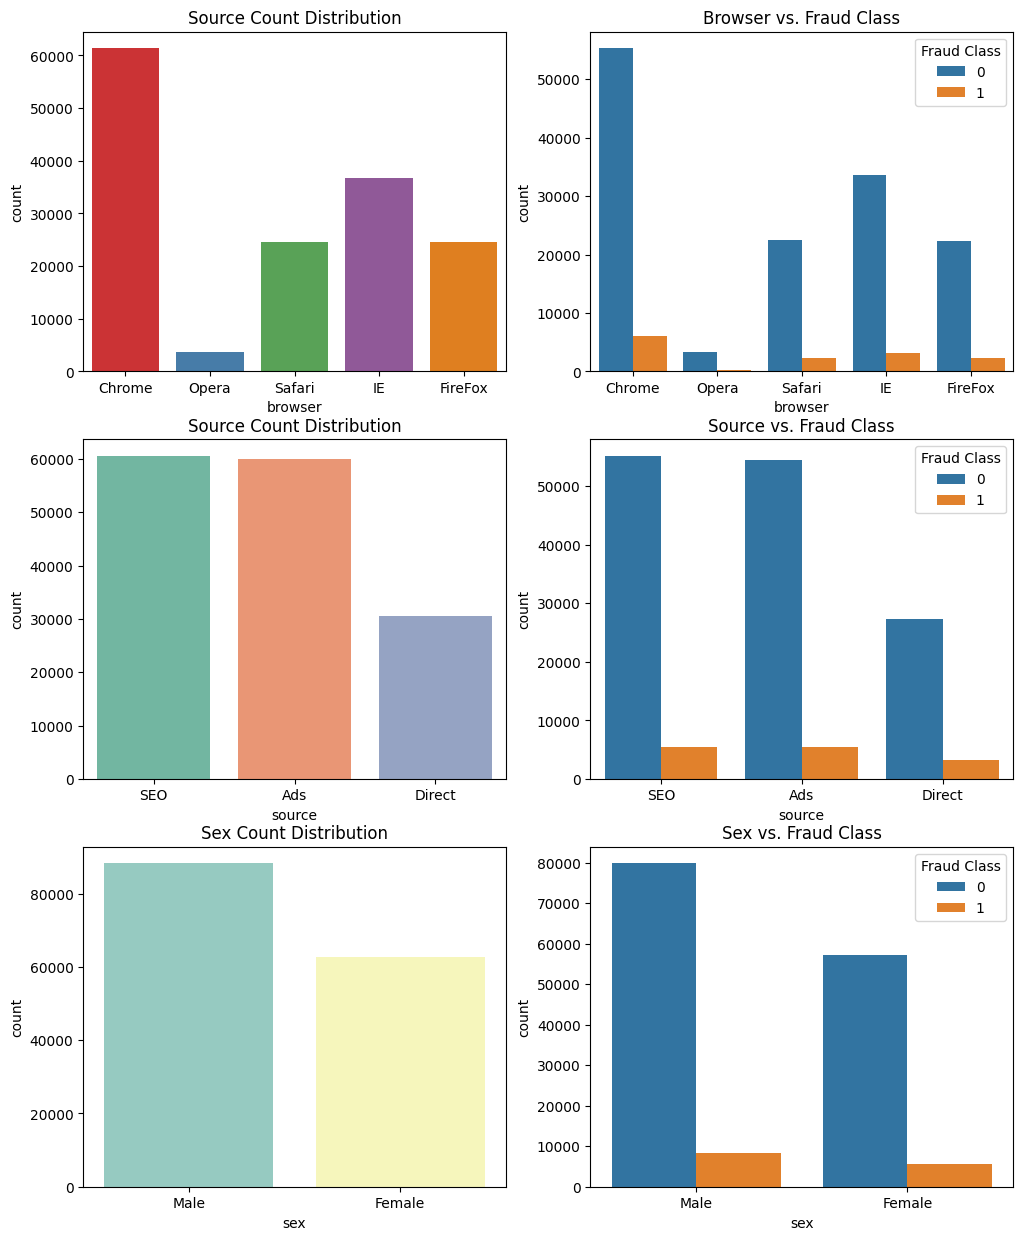

In [15]:
dp.categorical_value_visualization(fraud_df)

### Time Series Analysis

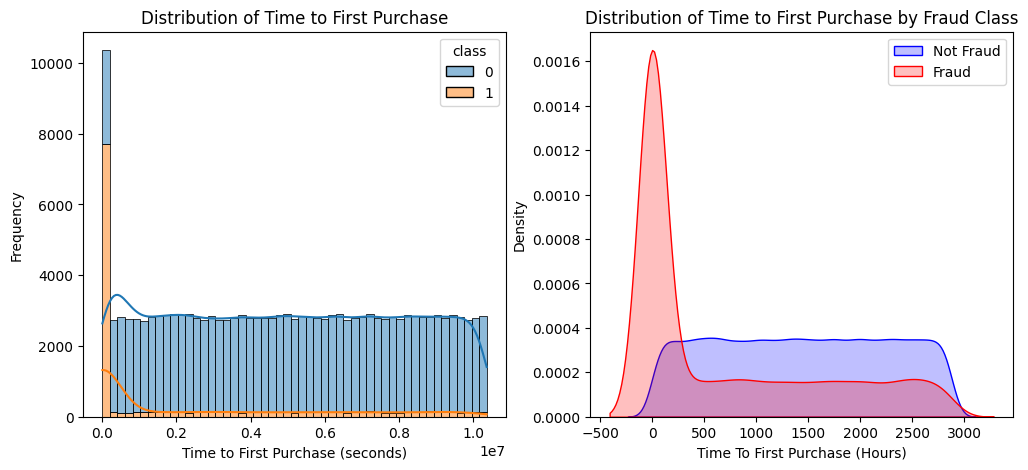

In [16]:
dp.time_to_first_purchase_visualization(fraud_df)

**Insight:** As we can clearly see from the above two plot, most pf the fraud transaction occured at the fastest time to purchase after signup

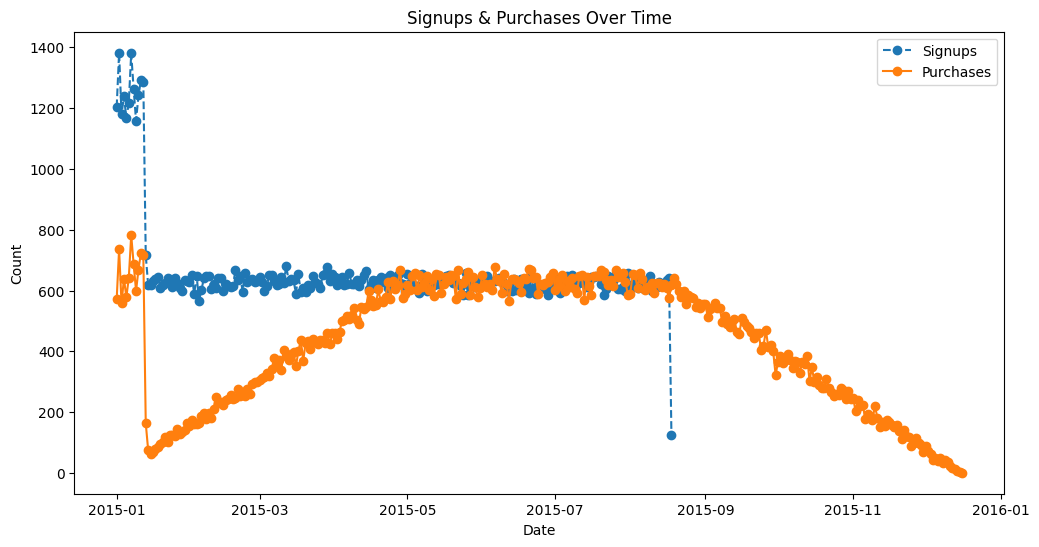

In [17]:
# See trend of signups and purchases over time
dp.signup_purchase_time_trend(fraud_df)

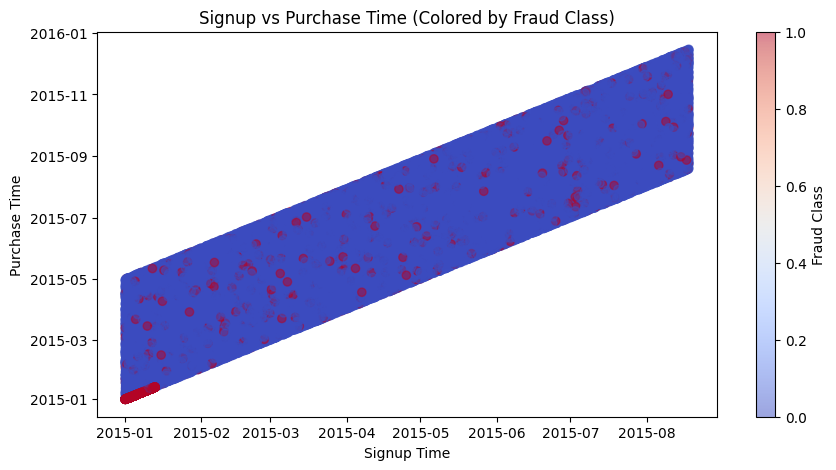

In [18]:
# relationship between signup_time and purchase_time
dp.relation_signup_purchase_time(fraud_df)

### Merge Fraud Dataset with Ip Address dataset

In [19]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [20]:
fraud_df.head()

,user_id,signup_time,purchase_time,time_to_first_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,492085.0,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,4361461.0,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [21]:
merged_df = dp.merge_data(fraud_df, ip_address_df)
merged_df.head()


,user_id,signup_time,purchase_time,time_to_first_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,3632215.0,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,1231637.0,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,1997534.0,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,7640897.0,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,10249579.0,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,Thailand


### Feature Engineering

In [22]:
engineered_df = dp.feature_engineering(merged_df)
engineered_df.head()

,time_to_first_purchase,purchase_value,source,browser,sex,age,ip_address,class,country,signup_year,signup_month,signup_day,signup_hour,purchase_year,purchase_month,purchase_day,purchase_hour,days_between_signup_purchase,transaction_velocity,age_group
634,3632215.0,47,SEO,Safari,F,30,1.677886e+07,0,Australia,2015,6,28,3,2015,8,9,3,42,0.023810,Adult
635,1231637.0,15,SEO,Chrome,F,34,1.684205e+07,0,Thailand,2015,1,28,14,2015,2,11,20,14,0.071429,Adult
636,1997534.0,44,Ads,IE,M,29,1.684366e+07,0,China,2015,3,19,20,2015,4,11,23,23,0.043478,Adult
637,7640897.0,55,Direct,Chrome,F,30,1.693873e+07,0,China,2015,2,24,6,2015,5,23,16,88,0.011364,Adult
638,10249579.0,51,SEO,Chrome,F,37,1.697198e+07,0,Thailand,2015,7,7,12,2015,11,3,4,118,0.008475,Middle_Aged


### Encode Categorical column 

In [23]:
# encode Categorical column 
processed_df = dp.categorical_encoder(engineered_df)

In [24]:
processed_df.head()

,time_to_first_purchase,purchase_value,age,ip_address,class,country,signup_year,signup_month,signup_day,signup_hour,...,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,age_group_Youth,age_group_Adult,age_group_Middle_Aged,age_group_Senior
634,3632215.0,47,30,1.677886e+07,0,7,2015,6,28,3,...,False,False,False,True,True,False,False,True,False,False
635,1231637.0,15,34,1.684205e+07,0,162,2015,1,28,14,...,False,False,False,False,True,False,False,True,False,False
636,1997534.0,44,29,1.684366e+07,0,36,2015,3,19,20,...,False,True,False,False,False,True,False,True,False,False
637,7640897.0,55,30,1.693873e+07,0,36,2015,2,24,6,...,False,False,False,False,True,False,False,True,False,False
638,10249579.0,51,37,1.697198e+07,0,162,2015,7,7,12,...,False,False,False,False,True,False,False,False,True,False


### Save Processed Fraud Data

In [25]:
processed_df.to_csv('../data/processed_fraud_data.csv', index=False)